# 1. initial Setup and Imports

In [12]:
#import numpy for number array handling and represent rgb image pixel values
import numpy as np

#import tensorflow to use any tools needed for deep learning
import tensorflow as tf

#import keras api needed to implement deep learning techiques
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import libraries for visualization of data
import matplotlib.pyplot as plt

#Allow charts and graphics to display right below the page of browser setup
%matplotlib inline

# 2. Load and Split images along with applying Data Preprocessing and Data Augmentation

In [13]:
#paths to the train, validation and test image datasets 
train_path = '../input/garbage-classification/garbage classification/Garbage classification'
valid_path = '../input/garbage-classification/garbage classification/Garbage classification'


# extract images to training set by applying data preprocessing and data augmentation
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')


# extract images to validation set
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.1).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')


Found 0 images belonging to 6 classes.
Found 0 images belonging to 6 classes.


# 3. Visualization of the images after Preprocessing

In [14]:
# plot images after applying VGG16 data preprocessing method
def plotImages(images, num_images):
    # Adjust the number of subplots based on the number of images in the batch
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

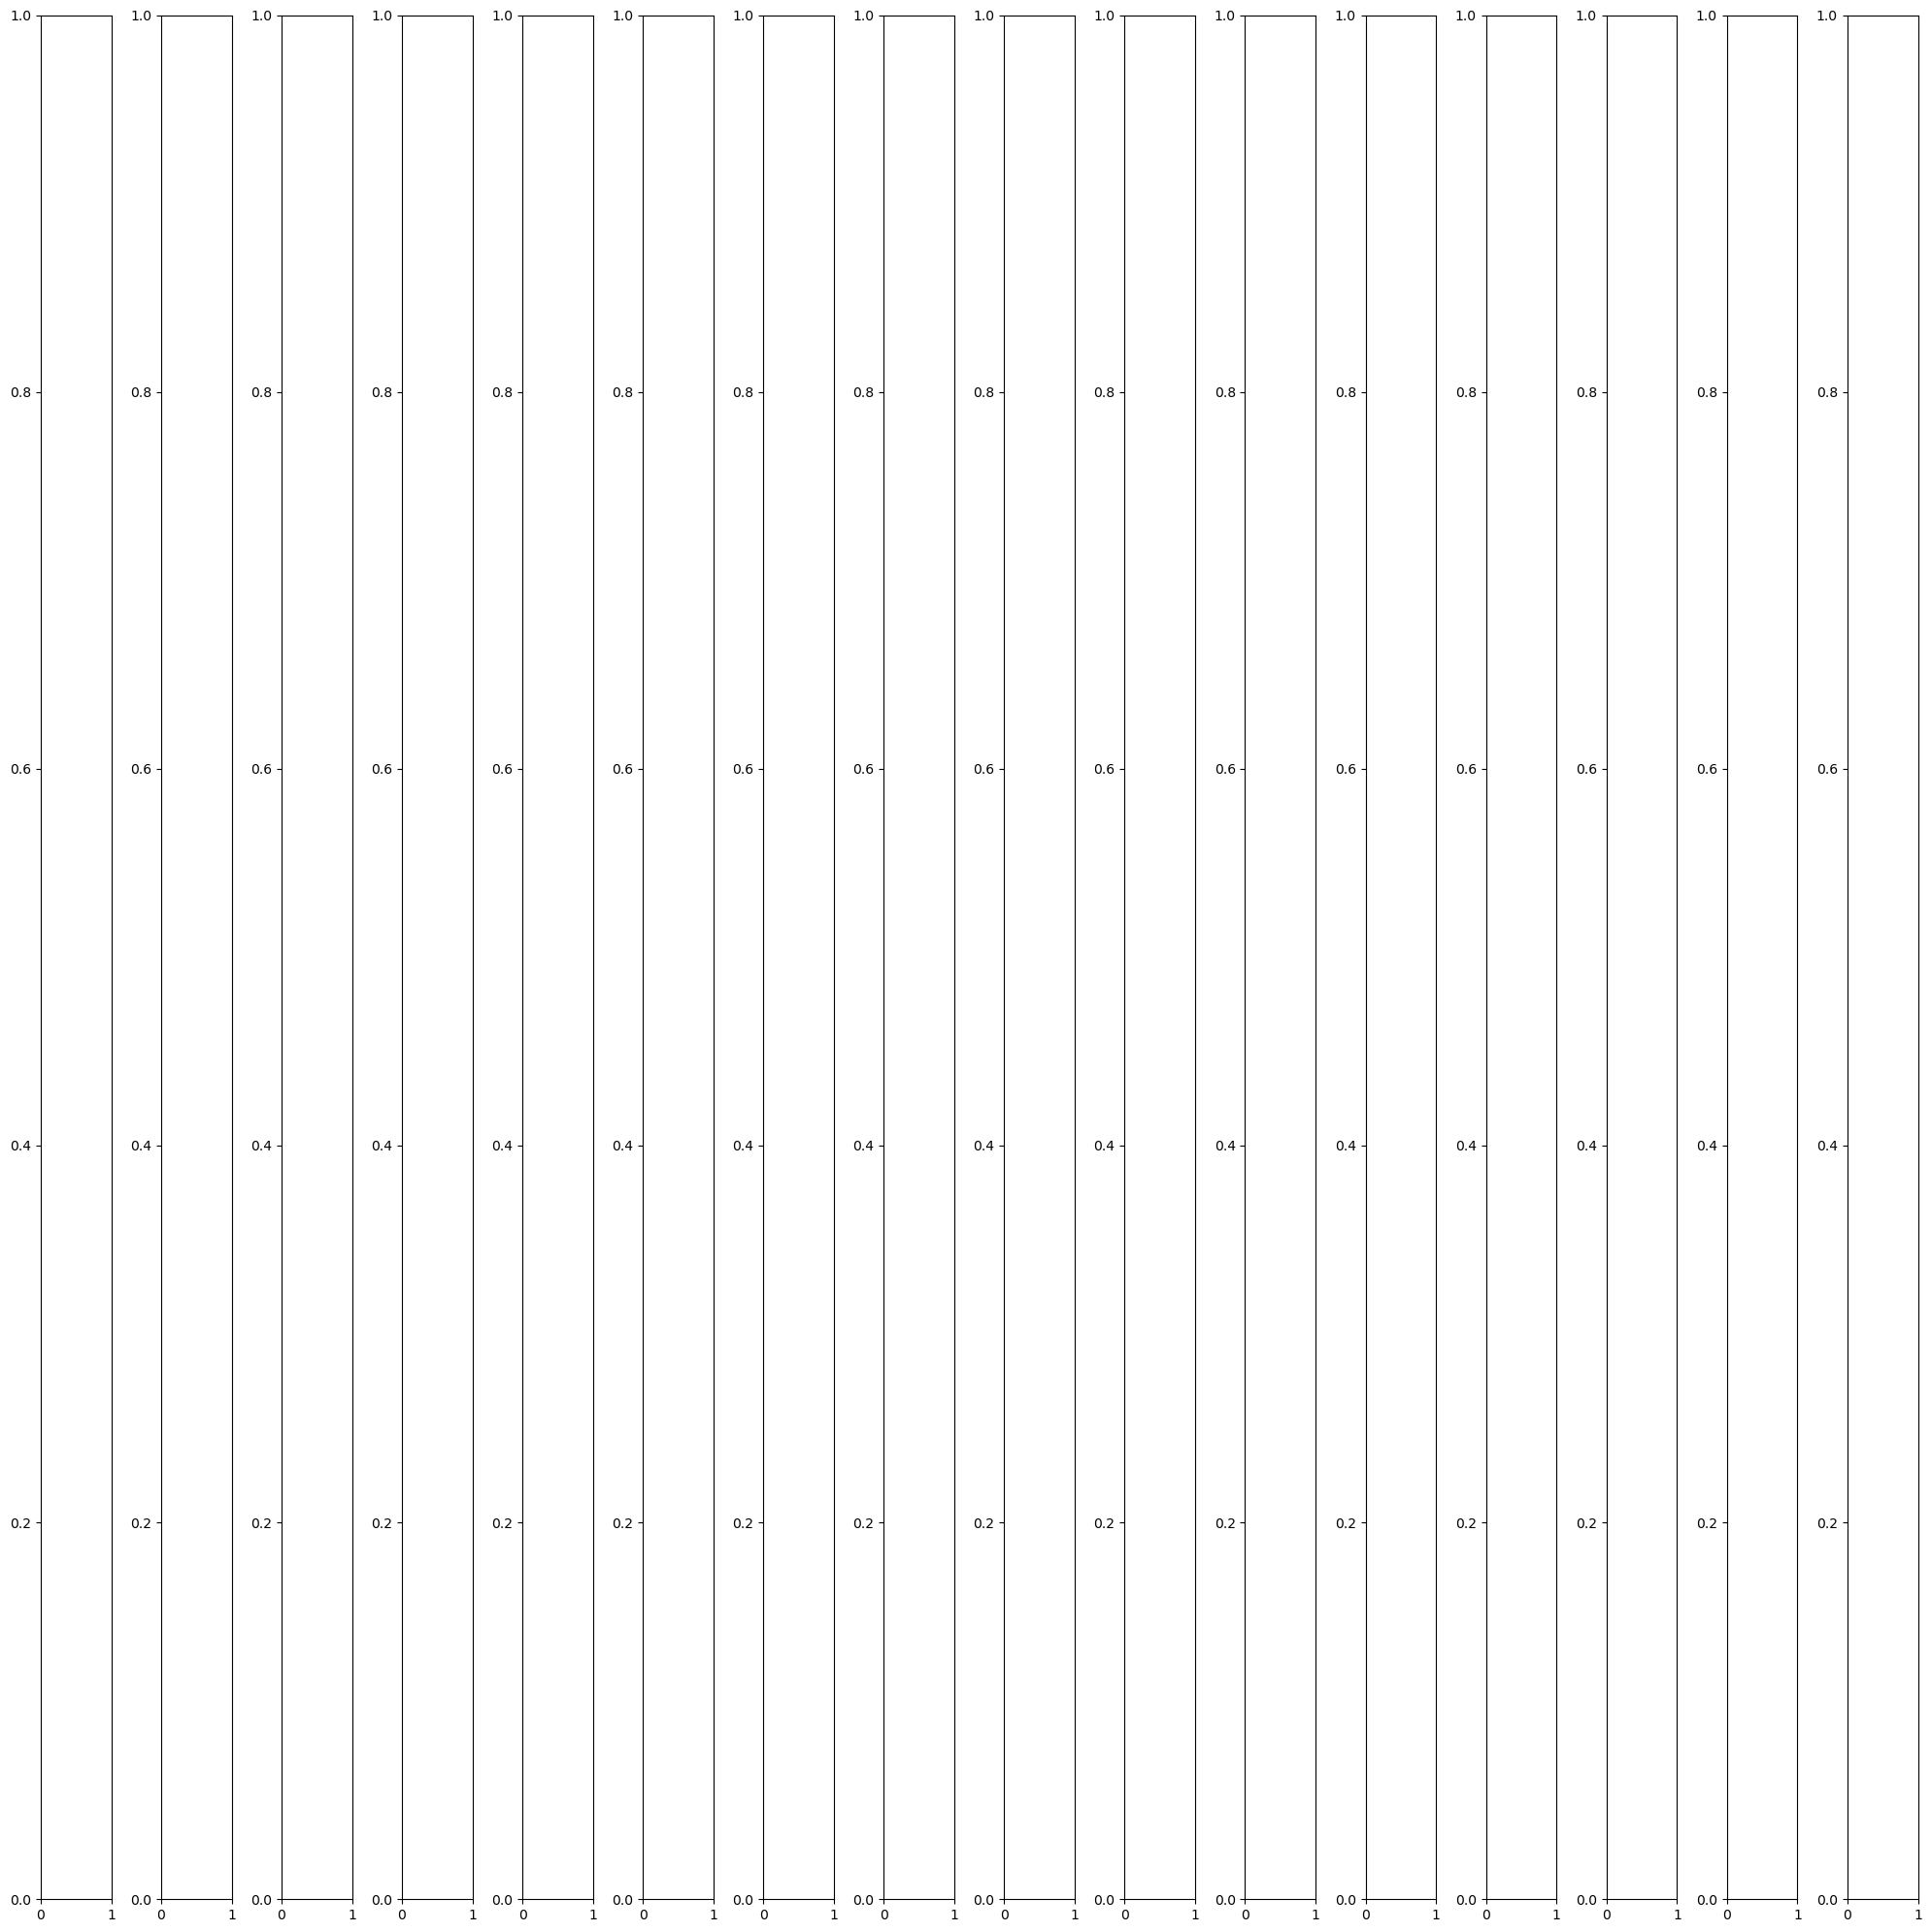

In [17]:
imgs, labels = next(train_batches)
plotImages(imgs, 16)  # Update to plot 16 images

# 4. Building CNN Architecture

In [5]:
# set the input image size for proposed CNN model
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# import the convolution base of the VGG16 model with pre-trained weights
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE, 
                                        include_top=False,
                                        weights='imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
# summary of convolution base of VGG16 model
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
# Initialize a sequential model to group a linear stack of layers
model = Sequential()

# Freeze the convolutional base of VGG16 to prevent the pre-trained weights being updated 
# during training inorder to extract features
base_model.trainable=False

# add VGG16 convolution base to initialize sequential model
model.add(base_model)

# add global average pooling layer
model.add(GlobalAveragePooling2D())

# add densely-connected NN layer with 512 hidden units
model.add(Dense(units=512, activation='relu'))  # use ReLU activation function
model.add(BatchNormalization())                 # normalize and scale inputs or activations
model.add(Dropout(0.2))                         # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 128 hidden units
model.add(Dense(units=128, activation='relu')) # use ReLU activation function
model.add(BatchNormalization())                # normalize and scale inputs or activations
model.add(Dropout(0.2))                        # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 6 hidden units
model.add(Dense(units=6, activation='softmax')) # use Softmax activation function to do final predictions

In [8]:
# summary of proposed CNN model(architecture)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               5

# 5. Compile the Built CNN Model

In [9]:
# compile the built CNN model by selecting suitable optimizer and loss function
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train the CNN model

In [10]:
# train the model with appropriate number of epochs
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=18, verbose=2)

Epoch 1/18
143/143 - 48s - loss: 1.6313 - accuracy: 0.4170 - val_loss: 0.9585 - val_accuracy: 0.6175
Epoch 2/18
143/143 - 36s - loss: 0.9751 - accuracy: 0.6371 - val_loss: 0.7284 - val_accuracy: 0.7131
Epoch 3/18
143/143 - 35s - loss: 0.8126 - accuracy: 0.7069 - val_loss: 0.6139 - val_accuracy: 0.7809
Epoch 4/18
143/143 - 36s - loss: 0.7299 - accuracy: 0.7425 - val_loss: 0.5526 - val_accuracy: 0.7888
Epoch 5/18
143/143 - 35s - loss: 0.6383 - accuracy: 0.7623 - val_loss: 0.5276 - val_accuracy: 0.8048
Epoch 6/18
143/143 - 35s - loss: 0.6036 - accuracy: 0.7825 - val_loss: 0.4871 - val_accuracy: 0.8088
Epoch 7/18
143/143 - 36s - loss: 0.5474 - accuracy: 0.8018 - val_loss: 0.4619 - val_accuracy: 0.8446
Epoch 8/18
143/143 - 36s - loss: 0.5073 - accuracy: 0.8159 - val_loss: 0.4471 - val_accuracy: 0.8327
Epoch 9/18
143/143 - 36s - loss: 0.4775 - accuracy: 0.8229 - val_loss: 0.4354 - val_accuracy: 0.8367
Epoch 10/18
143/143 - 36s - loss: 0.4290 - accuracy: 0.8401 - val_loss: 0.4273 - val_accura

In [11]:
# store the losses of training
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [12]:
# store the accuracy of training
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

# 7. Fine Tune the CNN model

In [13]:
# unfreeze the convolution base of VGG16 inorder to fine-tune which adapt these pre-trained weights 
# to work with the new dataset
base_model.trainable=True

In [14]:
# summary of the fine-tune CNN model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               5

In [15]:
# train and fine-tune the model with appropriate number of epochs
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=4, verbose=2)

Epoch 1/4
143/143 - 36s - loss: 0.3252 - accuracy: 0.8866 - val_loss: 0.3895 - val_accuracy: 0.8845
Epoch 2/4
143/143 - 37s - loss: 0.2926 - accuracy: 0.8959 - val_loss: 0.3738 - val_accuracy: 0.8765
Epoch 3/4
143/143 - 35s - loss: 0.2719 - accuracy: 0.9003 - val_loss: 0.3870 - val_accuracy: 0.8725
Epoch 4/4
143/143 - 36s - loss: 0.2830 - accuracy: 0.8981 - val_loss: 0.3714 - val_accuracy: 0.8805


# 8. Visulization of Accuracy and Loss in Training and  Validation sets

In [16]:
# append the losses to previous stored losses
loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])

In [17]:
# append the accuracy to previous stored accuracy
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])

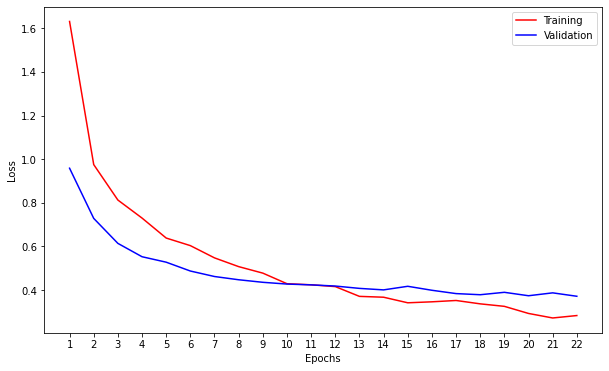

In [18]:
# plot the training and validation losses
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

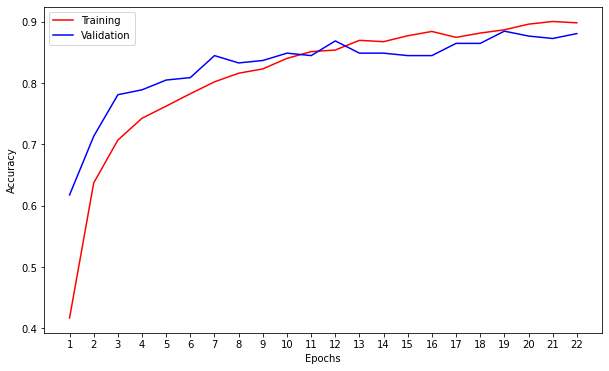

In [19]:
# plot the training and validation accuracy
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()